### Non-unitary weight

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_lyapunov
import pylab

In [2]:
w = 0.5

### GKD1

In [3]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2])

In [4]:
G.add_edge(1,0,weight=1)
G.add_edge(2,0,weight=w)

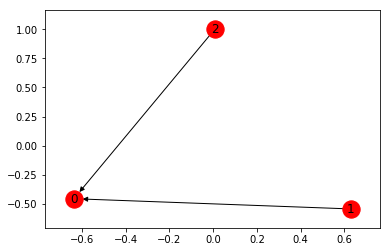

In [5]:
nx.draw_networkx(G)

In [6]:
A = nx.adjacency_matrix(G)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

2

In [7]:
def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [8]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [9]:
L

matrix([[ 0. ,  0. ,  0. ],
        [-1. ,  1. ,  0. ],
        [-0.5,  0. ,  0.5]])

In [10]:
Q

matrix([[-0.75130448,  0.65252078,  0.0987837 ],
        [-0.31970025, -0.49079864,  0.81049889]])

In [11]:
rL

matrix([[ 0.95801257, -0.05582262],
        [-0.34449776,  0.54198743]])

In [12]:
sigma

array([[0.53124436, 0.16012815],
       [0.16012815, 1.0243112 ]])

In [13]:
x

matrix([[ 0.96296296, -0.14814815, -0.81481481],
        [-0.14814815,  0.74074074, -0.59259259],
        [-0.81481481, -0.59259259,  1.40740741]])

In [14]:
eqL

matrix([[ 0.53571429, -0.42857143, -0.10714286],
        [-0.42857143,  0.64285714, -0.21428571],
        [-0.10714286, -0.21428571,  0.32142857]])

In [15]:
np.divide(eqL,x)

matrix([[0.55631868, 2.89285714, 0.13149351],
        [2.89285714, 0.86785714, 0.36160714],
        [0.13149351, 0.36160714, 0.22838346]])

### GKD2

In [16]:
G1 = nx.DiGraph()

In [17]:
G1.add_edge(0,1,weight=1)
G1.add_edge(0,2,weight=w)

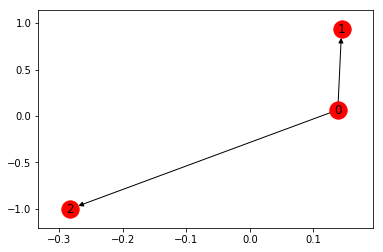

In [18]:
nx.draw_networkx(G1)

In [19]:
A = nx.adjacency_matrix(G1)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

1

In [20]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [21]:
L

matrix([[ 1.5, -1. , -0.5],
        [ 0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ]])

In [22]:
Q

matrix([[ 0.80178373, -0.53452248, -0.26726124]])

In [23]:
rL

matrix([[1.5]])

In [24]:
sigma

array([[0.33333333]])

In [25]:
x

matrix([[ 0.42857143, -0.28571429, -0.14285714],
        [-0.28571429,  0.19047619,  0.0952381 ],
        [-0.14285714,  0.0952381 ,  0.04761905]])

In [26]:
eqL

matrix([[ 0.96428571, -0.64285714, -0.32142857],
        [-0.64285714,  0.42857143,  0.21428571],
        [-0.32142857,  0.21428571,  0.10714286]])

In [27]:
1.7**2

2.8899999999999997

In [28]:
1/(2*1.7)

0.29411764705882354

In [29]:
neg_weight = lambda w: 0.5*w*w*(1 + w)/(1+w+w**2)

In [30]:
neg_weight(0.7)

0.19018264840182644

In [31]:
np.divide(eqL,x)

matrix([[2.25, 2.25, 2.25],
        [2.25, 2.25, 2.25],
        [2.25, 2.25, 2.25]])